In [1]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator 
import os

In [2]:
train_dir='C:\\Users\\Raheel\\fruits_classification\\fruits-360_dataset\\fruits-360\\Training'

In [3]:
validation_dir='C:\\Users\\Raheel\\fruits_classification\\fruits-360_dataset\\fruits-360\\Test'

In [4]:
from tensorflow.python.keras import models
from tensorflow.python.keras import layers
from tensorflow.python.keras.applications import VGG16

In [5]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(72,activation='softmax'))

In [6]:
from tensorflow.python.keras import optimizers

model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['categorical_accuracy'])

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(100, 100),
        batch_size=32)

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(100, 100),
        batch_size=32, shuffle=False)

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 36117 images belonging to 72 classes.
Found 12132 images belonging to 72 classes.
Epoch 1/100
100/100 [==============================] - 14s 144ms/step - loss: 4.2464 - categorical_accuracy: 0.0216 - val_loss: 4.3146 - val_categorical_accuracy: 0.0000e+00
Epoch 2/100
100/100 [==============================] - 10s 103ms/step - loss: 3.6669 - categorical_accuracy: 0.0778 - val_loss: 3.1988 - val_categorical_accuracy: 0.1613
Epoch 3/100
100/100 [==============================] - 12s 121ms/step - loss: 2.8600 - categorical_accuracy: 0.1722 - val_loss: 2.7746 - val_categorical_accuracy: 0.1956
Epoch 4/100
100/100 [==============================] - 11s 114ms/step - loss: 2.5142 - categorical_accuracy: 0.2422 - val_loss: 2.8054 - val_categorical_accuracy: 0.1237
Epoch 5/100
100/100 [==============================] - 10s 105ms/step - loss: 2.1976 - categorical_accuracy: 0.3144 - val_loss: 2.1816 - val_categorical_accuracy: 0.2644
Epoch 6/100
100/100 [==============================] - 11s

100/100 [==============================] - 11s 105ms/step - loss: 0.2854 - categorical_accuracy: 0.8950 - val_loss: 0.2592 - val_categorical_accuracy: 0.9012
Epoch 49/100
100/100 [==============================] - 10s 103ms/step - loss: 0.2816 - categorical_accuracy: 0.8966 - val_loss: 0.1563 - val_categorical_accuracy: 0.9619
Epoch 50/100
100/100 [==============================] - 10s 104ms/step - loss: 0.3265 - categorical_accuracy: 0.8850 - val_loss: 0.2298 - val_categorical_accuracy: 0.9237
Epoch 51/100
100/100 [==============================] - 11s 108ms/step - loss: 0.2865 - categorical_accuracy: 0.8953 - val_loss: 0.1674 - val_categorical_accuracy: 0.9381
Epoch 52/100
100/100 [==============================] - 12s 116ms/step - loss: 0.2870 - categorical_accuracy: 0.8969 - val_loss: 0.2056 - val_categorical_accuracy: 0.9337
Epoch 53/100
100/100 [==============================] - 11s 113ms/step - loss: 0.2759 - categorical_accuracy: 0.9034 - val_loss: 0.3290 - val_categorical_accu

Epoch 96/100
100/100 [==============================] - 10s 105ms/step - loss: 0.1681 - categorical_accuracy: 0.9378 - val_loss: 0.1039 - val_categorical_accuracy: 0.9569
Epoch 97/100
100/100 [==============================] - 11s 111ms/step - loss: 0.1606 - categorical_accuracy: 0.9441 - val_loss: 0.2181 - val_categorical_accuracy: 0.9237
Epoch 98/100
100/100 [==============================] - 11s 110ms/step - loss: 0.1573 - categorical_accuracy: 0.9434 - val_loss: 0.1974 - val_categorical_accuracy: 0.9244
Epoch 99/100
100/100 [==============================] - 11s 106ms/step - loss: 0.1790 - categorical_accuracy: 0.9381 - val_loss: 0.1506 - val_categorical_accuracy: 0.9481
Epoch 100/100
100/100 [==============================] - 11s 109ms/step - loss: 0.1702 - categorical_accuracy: 0.9356 - val_loss: 0.2145 - val_categorical_accuracy: 0.9156


In [8]:
import matplotlib.pyplot as plt

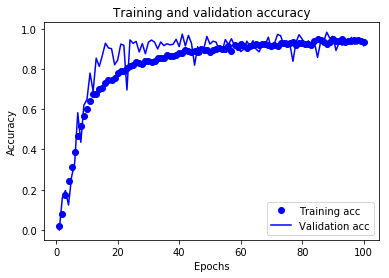

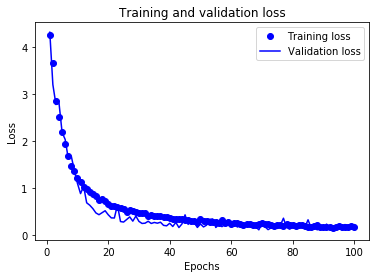

In [9]:
acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('fruit_images_classification_using data augmentation4a',format='png')
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('fruit_images_classification_using data augmentation4b',format='png')
plt.show()

In [10]:
steps_test=12132/32

In [11]:
print(steps_test)

379.125


In [13]:
result = model.evaluate_generator(validation_generator, steps=steps_test)
print("Test-set classification accuracy: {0:.2%}".format(result[1]))

Test-set classification accuracy: 94.86%
